2) Para este ejercicio deberás usar CAMB o CLASS, junto con algún código que calcule la no linealidades del espectro de potencias en espacio de redshift, como FOLPS. Encuentra el cambio del espectro de potencias en tres casos distintos $(A: \ell = 0)$ el monopolo del espectro de potencias a 1 loop en espacio de redshift, $(A: \ell = 2)$ el cuadrupolo y $(A=L)$ el espectro de potencias lineal en espacio real con respecto a distintos parámetros cosmológicos $\Omega_i = \{  \omega_b, \omega_c, n_s, A_s, h, M_{\nu}, N_{\text{eff}}  \}$. Los parámetros que no cambien mantenlos con una cosmología fija de Planck. Utiliza redshift $z = 0.5$. Es decir, calcula numéricamente:

$$
\frac{1}{P_A(k)}\frac{\partial P_A(k)}{\partial \Omega_i}
$$

In [1]:
# Import standard libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import camb
# Import routine
import sys
sys.path.append('../')
import FOLPSnu as FOLPS

In [2]:
# Settings
zeff = 0.5
npoints = 3000
kmin = 0.001
kmax = 0.3
colors=['#1ABC9C', '#F44336', '#3498DB', '#9B59B6', '#34495E', '#3F51B5', '#E67E22']

# Usuful functions
# Get power spectrum from CAMB
def PowerSpectrum(omega_b, omega_cdm, ns, log10As, h, Mnu, Neff, zeff=[zeff]):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=h*100, ombh2=omega_b, omch2=omega_cdm, omk=0.0, tau=0.0561, 
                       standard_neutrino_neff=Neff, num_massive_neutrinos=1, neutrino_hierarchy='normal', 
                       mnu=Mnu, nnu=Neff)
    pars.InitPower.set_params(ns=ns, As=np.exp(log10As)/1e10)
    pars.set_matter_power(redshifts=zeff, kmax=kmax)
    results = camb.get_results(pars)
    k, _, pk = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=npoints)
    return k, pk[0]
# Get multipoles from FOLPS
def get_multipoles(pkT, CosmoParams, NuisanParams):
    nonlinear = FOLPS.NonLinear(pkT, CosmoParams, kminout=kmin, kmaxout=kmax, nk=npoints)
    k_ev = np.logspace(np.log10(kmin), np.log10(0.3), num = npoints) # array of k_ev in [h/Mpc]
    kh, Pkl0, Pkl2, _ = FOLPS.RSDmultipoles(k_ev, NuisanParams, AP = False)
    return kh, Pkl0, Pkl2

In [3]:
# Cosmological parameters
# Baryons
omega_b = 0.02242
# Cold Dark Matter
omega_cdm = 0.11933
# Scalar spectral index
ns = 0.9665
# Scalar amplitude
log10As = 3.047
# Hubble
h = 0.6766
# Neutrino's stuff
omega_ncdm = 0.00429461
Mnu = 94*omega_ncdm
# Effective number of relativistic species
Neff = 3.04

# Collect params
CosmoParams = [zeff, omega_b, omega_cdm, omega_ncdm, h]

Usando la definición de la derivada:

$$
f'(x) = \lim_{\delta\to 0}\frac{f(x + \delta) - f(x)}{\delta} \approx \frac{f(\Delta) - f(x)}{\Delta - x}
$$

Para un $\delta$ lo suficiente pequeño. Como prueba se utiliza la derivada de la función $\sin(x)$:

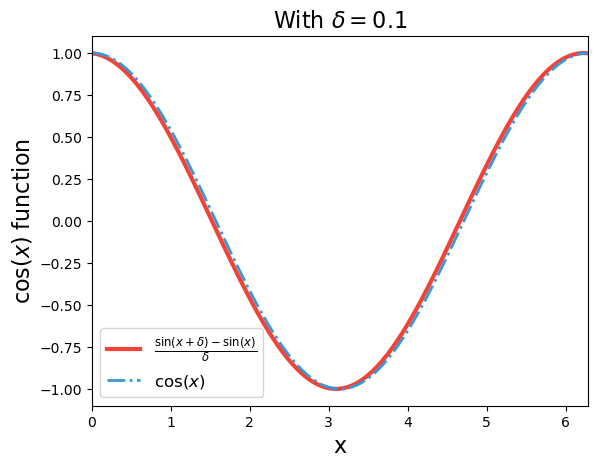

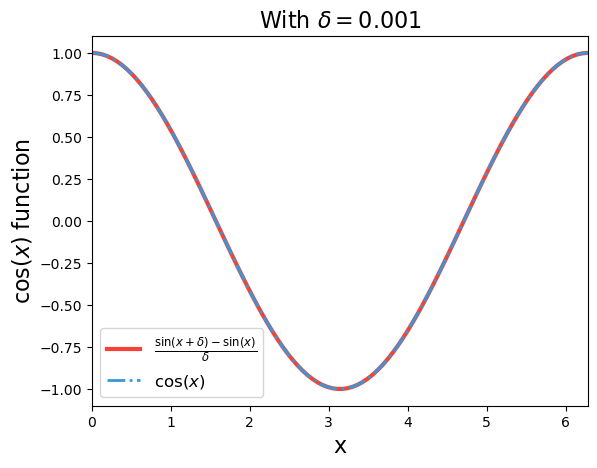

In [4]:
x = np.linspace(0, 2*np.pi, 100)

y1 = (np.sin(x + 0.1) - np.sin(x))/(0.1)
y2 = np.cos(x)
# Plot
plt.plot(x, y1, label=r'$\frac{\sin(x+\delta)-\sin(x)}{\delta}$', color=colors[1], linestyle='-', linewidth=3)
plt.plot(x, y2, label='$\cos (x)$', color=colors[2], linestyle='-.', linewidth=2)
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$\cos(x)$ function', fontsize=16)
plt.xlim(0, 2*np.pi)
plt.title(r'With $\delta=0.1$', fontsize=16)
plt.legend(fontsize=12)
plt.show()

y1 = (np.sin(x + 0.001) - np.sin(x))/(0.001)
# Plot
plt.plot(x, y1, label=r'$\frac{\sin(x+\delta)-\sin(x)}{\delta}$', color=colors[1], linestyle='-', linewidth=3)
plt.plot(x, y2, label='$\cos (x)$', color=colors[2], linestyle='-.', linewidth=2)
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$\cos(x)$ function', fontsize=16)
plt.xlim(0, 2*np.pi)
plt.title(r'With $\delta=0.001$', fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [5]:
# Small value for delta
delta = 1e-4
# Delta
Delta = 1.0 + delta
# Baryons
Delta_omega_b = omega_b*Delta
# Cold Dark Matter
Delta_omega_cdm = omega_cdm*Delta
# Scalar spectral index
Delta_ns = ns*Delta
# Scalar amplitude
Delta_log10As = log10As*Delta
# Hubble
Delta_h = h*Delta
# Neutrino's stuff
Delta_omega_ncdm = omega_ncdm*Delta
Delta_Mnu = 94*Delta_omega_ncdm
# Effective number of relativistic species
Delta_Neff = Neff*Delta

# Collect delta params
Delta_omegab_CosmoParams = [zeff, Delta_omega_b, omega_cdm, omega_ncdm, h]
Delta_omegac_CosmoParams = [zeff, omega_b, Delta_omega_cdm, omega_ncdm, Delta_h]
Delta_h_CosmoParams = [zeff, omega_b, omega_cdm, omega_ncdm, Delta_h]
Delta_Mnu_CosmoParams = [zeff, omega_b, omega_cdm, Delta_omega_ncdm, h]

In [6]:
# Nuisance parameters
# Bias parameters
b1 = 1.645           
b2 = -0.46                 
bs2 = -4/7*(b1 - 1)    
b3nl = 32/315*(b1 - 1)
# EFT parameters
alpha0 = 3                 #units: [Mpc/h]^2
alpha2 = -28.9             #units: [Mpc/h]^2
alpha4 = 0.0               #units: [Mpc/h]^2
ctilde = 0.0               #units: [Mpc/h]^4
# Stochatics parameters
alphashot0 = 0.08          
alphashot2 = -8.1          #units: [Mpc/h]^2      
PshotP = 1/0.0002118763    #units: [Mpc/h]^3
NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, ctilde, alphashot0, alphashot2, PshotP]

In [7]:
# Computation of M matrices
matrices = FOLPS.Matrices()

N = 128 sampling points
M matrices have been computed


In [8]:
# Get all linear power spectrum
# Standard
k_L, pk_L = PowerSpectrum(omega_b, omega_cdm, ns, log10As, h, Mnu, Neff)
pkT = np.column_stack((k_L, pk_L))
np.savetxt('pkT.dat', pkT)
# With Delta omega_b
Delta1k_L, Delta1pk_L = PowerSpectrum(Delta_omega_b, omega_cdm, ns, log10As, h, Mnu, Neff)
Delta_omegab_pkT = np.column_stack((Delta1k_L, Delta1pk_L))
np.savetxt('Delta_omegab_pkT.dat', Delta_omegab_pkT)
# With Delta omega_cdm
Delta2k_L, Delta2pk_L = PowerSpectrum(omega_b, Delta_omega_cdm, ns, log10As, h, Mnu, Neff)
Delta_omegac_pkT = np.column_stack((Delta2k_L, Delta2pk_L))
np.savetxt('Delta_omegac_pkT.dat', Delta_omegac_pkT)
# With Delta ns
Delta3k_L, Delta3pk_L = PowerSpectrum(omega_b, omega_cdm, Delta_ns, log10As, h, Mnu, Neff)
Delta_ns_pkT = np.column_stack((Delta3k_L, Delta3pk_L))
np.savetxt('Delta_ns_pkT.dat', Delta_ns_pkT)
# With Delta log10As
Delta4k_L, Delta4pk_L = PowerSpectrum(omega_b, omega_cdm, ns, Delta_log10As, h, Mnu, Neff)
Delta_log10As_pkT = np.column_stack((Delta4k_L, Delta4pk_L))
np.savetxt('Delta_log10As_pkT.dat', Delta_log10As_pkT)
# With Delta h
Delta5k_L, Delta5pk_L = PowerSpectrum(omega_b, omega_cdm, ns, log10As, Delta_h, Mnu, Neff)
Delta_h_pkT = np.column_stack((Delta5k_L, Delta5pk_L))
np.savetxt('Delta_h_pkT.dat', Delta_h_pkT)
# With Delta Mnu
Delta6k_L, Delta6pk_L = PowerSpectrum(omega_b, omega_cdm, ns, log10As, h, Delta_Mnu, Neff)
Delta_Mnu_pkT = np.column_stack((Delta6k_L, Delta6pk_L))
np.savetxt('Delta_Mnu_pkT.dat', Delta_Mnu_pkT)
# With Delta Neff
Delta7k_L, Delta7pk_L = PowerSpectrum(omega_b, omega_cdm, ns, log10As, h, Mnu, Delta_Neff)
Delta_Neff_pkT = np.column_stack((Delta7k_L, Delta7pk_L))
np.savetxt('Delta_Neff_pkT.dat', Delta_Neff_pkT)

In [9]:
# Load the file for power spectrum
pkT = np.loadtxt('pkT.dat', unpack = True)
Delta_omegab_pkT = np.loadtxt('Delta_omegab_pkT.dat', unpack = True)
Delta_omegac_pkT = np.loadtxt('Delta_omegac_pkT.dat', unpack = True)
Delta_ns_pkT = np.loadtxt('Delta_ns_pkT.dat', unpack = True)
Delta_log10As_pkT = np.loadtxt('Delta_log10As_pkT.dat', unpack = True)
Delta_h_pkT = np.loadtxt('Delta_h_pkT.dat', unpack = True)
Delta_Mnu_pkT = np.loadtxt('Delta_Mnu_pkT.dat', unpack = True)
Delta_Neff_pkT = np.loadtxt('Delta_Neff_pkT.dat', unpack = True)

In [10]:
# Get the multipoles for every power spectrum
kh, Pkl0, Pkl2 = get_multipoles(pkT, CosmoParams, NuisanParams)
kh_Delta1, Pkl0_Delta1, Pkl2_Delta1 = get_multipoles(Delta_omegab_pkT, Delta_omegab_CosmoParams, NuisanParams)
kh_Delta2, Pkl0_Delta2, Pkl2_Delta2 = get_multipoles(Delta_omegac_pkT, Delta_omegac_CosmoParams, NuisanParams)
kh_Delta3, Pkl0_Delta3, Pkl2_Delta3 = get_multipoles(Delta_ns_pkT, CosmoParams, NuisanParams)
kh_Delta4, Pkl0_Delta4, Pkl2_Delta4 = get_multipoles(Delta_log10As_pkT, CosmoParams, NuisanParams)
kh_Delta5, Pkl0_Delta5, Pkl2_Delta5 = get_multipoles(Delta_h_pkT, Delta_h_CosmoParams, NuisanParams)
kh_Delta6, Pkl0_Delta6, Pkl2_Delta6 = get_multipoles(Delta_Mnu_pkT, Delta_Mnu_CosmoParams, NuisanParams)
kh_Delta7, Pkl0_Delta7, Pkl2_Delta7 = get_multipoles(Delta_Neff_pkT, CosmoParams, NuisanParams)

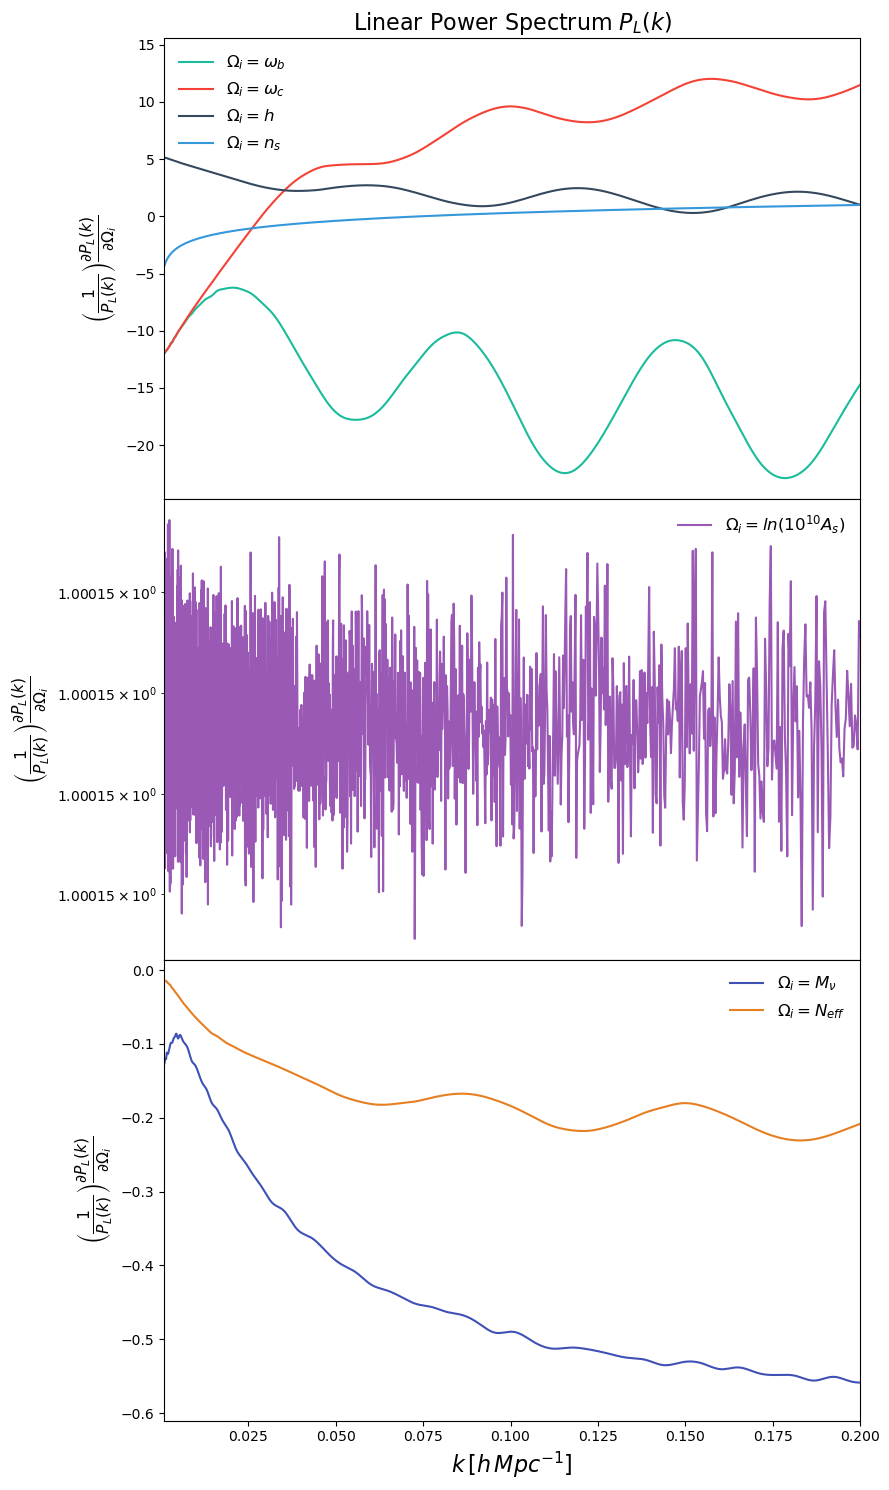

In [11]:
# Linear power spectrum
fig, axs = plt.subplots(3, 1, figsize=(9,15))
axs[0].set_ylabel(r'$\left(\frac{1}{P_L(k)}\right)\frac{\partial P_L(k)}{\partial \Omega_i}$', fontsize=16)
axs[0].plot(k_L, (Delta1pk_L - pk_L)/(Delta_omega_b - omega_b)/pk_L, color=colors[0], ls='-', label=r'$\Omega_i = \omega_b$')
axs[0].plot(k_L, (Delta2pk_L - pk_L)/(Delta_omega_cdm - omega_cdm)/pk_L, color=colors[1], ls='-', label=r'$\Omega_i = \omega_c$')
axs[0].plot(k_L, (Delta5pk_L - pk_L)/(Delta_h - h)/pk_L, color=colors[4], ls='-', label=r'$\Omega_i = h$')
axs[0].plot(k_L, (Delta3pk_L - pk_L)/(Delta_ns - ns)/pk_L, color=colors[2], ls='-', label=r'$\Omega_i = n_s$')
axs[0].set_xlim([kh[0], 0.2])
axs[0].set_xticks([])
axs[0].set_title('Linear Power Spectrum $P_L(k)$', fontsize=16)
leg1 = axs[0].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);

axs[1].set_ylabel(r'$\left(\frac{1}{P_L(k)}\right)\frac{\partial P_L(k)}{\partial \Omega_i}$', fontsize=16)
axs[1].plot(k_L, (Delta4pk_L - pk_L)/(Delta_log10As - log10As)/pk_L, color=colors[3], ls='-', label=r'$\Omega_i = ln(10^{10}A_s)$')
axs[1].set_xlim([kh[0], 0.2])
axs[1].set_xticks([])
axs[1].set_yscale('log')
leg1 = axs[1].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);

axs[2].set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize=16)
axs[2].set_ylabel(r'$\left(\frac{1}{P_L(k)}\right)\frac{\partial P_L(k)}{\partial \Omega_i}$', fontsize=16)
axs[2].plot(k_L, (Delta6pk_L - pk_L)/(Delta_Mnu - Mnu)/pk_L, color=colors[5], ls='-', label=r'$\Omega_i = M_{\nu}$')
axs[2].plot(k_L, (Delta7pk_L - pk_L)/(Delta_Neff - Neff)/pk_L, color=colors[6], ls='-', label=r'$\Omega_i = N_{eff}$')
axs[2].set_xlim([kh[0], 0.2])
leg1 = axs[2].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.show()

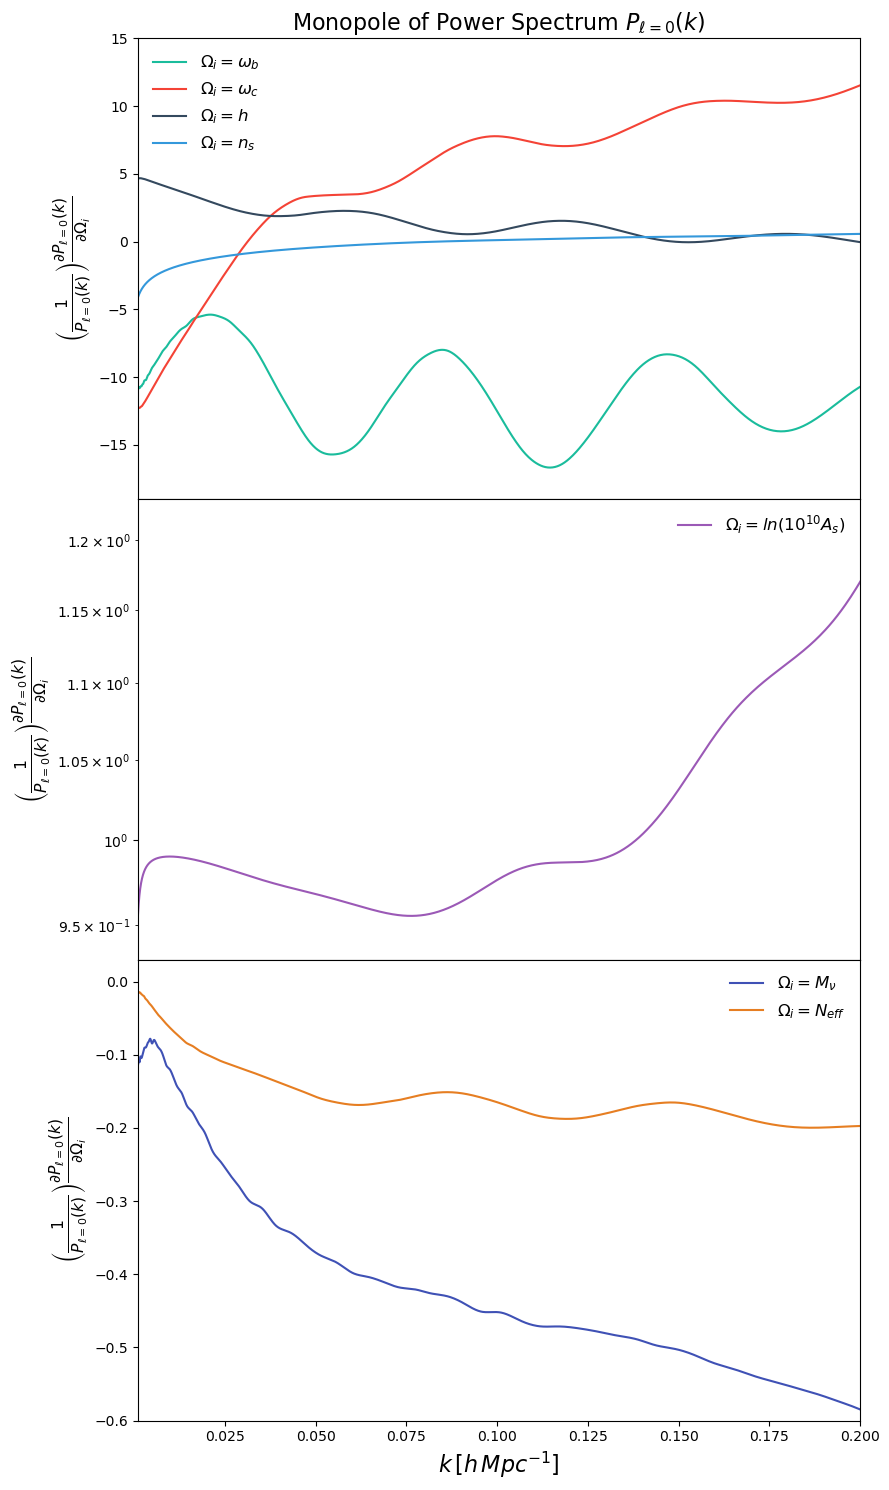

In [12]:
# Monopole
fig, axs = plt.subplots(3, 1, figsize=(9,15))
axs[0].set_ylabel(r'$\left(\frac{1}{P_{\ell = 0}(k)}\right)\frac{\partial P_{\ell = 0}(k)}{\partial \Omega_i}$', fontsize=16)
axs[0].plot(kh, (Pkl0_Delta1 - Pkl0)/(Delta_omega_b - omega_b)/Pkl0, color=colors[0], ls='-', label=r'$\Omega_i = \omega_b$')
axs[0].plot(kh, (Pkl0_Delta2 - Pkl0)/(Delta_omega_cdm - omega_cdm)/Pkl0, color=colors[1], ls='-', label=r'$\Omega_i = \omega_c$')
axs[0].plot(kh, (Pkl0_Delta5 - Pkl0)/(Delta_h - h)/Pkl0, color=colors[4], ls='-', label=r'$\Omega_i = h$')
axs[0].plot(kh, (Pkl0_Delta3 - Pkl0)/(Delta_ns - ns)/Pkl0, color=colors[2], ls='-', label=r'$\Omega_i = n_s$')
axs[0].set_xlim([kh[0], 0.2])
axs[0].set_ylim([-19, 15])
axs[0].set_xticks([])
axs[0].set_title('Monopole of Power Spectrum $P_{\ell = 0}(k)$', fontsize=16)
leg1 = axs[0].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);

axs[1].set_ylabel(r'$\left(\frac{1}{P_{\ell = 0}(k)}\right)\frac{\partial P_{\ell = 0}(k)}{\partial \Omega_i}$', fontsize=16)
axs[1].plot(kh, (Pkl0_Delta4 - Pkl0)/(Delta_log10As - log10As)/Pkl0, color=colors[3], ls='-', label=r'$\Omega_i = ln(10^{10}A_s)$')
axs[1].set_xlim([kh[0], 0.2])
axs[1].set_ylim([0.93, 1.23])
axs[1].set_xticks([])
axs[1].set_yscale('log')
leg1 = axs[1].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);

axs[2].set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize=16)
axs[2].set_ylabel(r'$\left(\frac{1}{P_{\ell = 0}(k)}\right)\frac{\partial P_{\ell = 0}(k)}{\partial \Omega_i}$', fontsize=16)
axs[2].plot(kh, (Pkl0_Delta6 - Pkl0)/(Delta_Mnu - Mnu)/Pkl0, color=colors[5], ls='-', label=r'$\Omega_i = M_{\nu}$')
axs[2].plot(kh, (Pkl0_Delta7 - Pkl0)/(Delta_Neff - Neff)/Pkl0, color=colors[6], ls='-', label=r'$\Omega_i = N_{eff}$')
axs[2].set_xlim([kh[0], 0.2])
axs[2].set_ylim([-0.6, 0.03])
leg1 = axs[2].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.show()

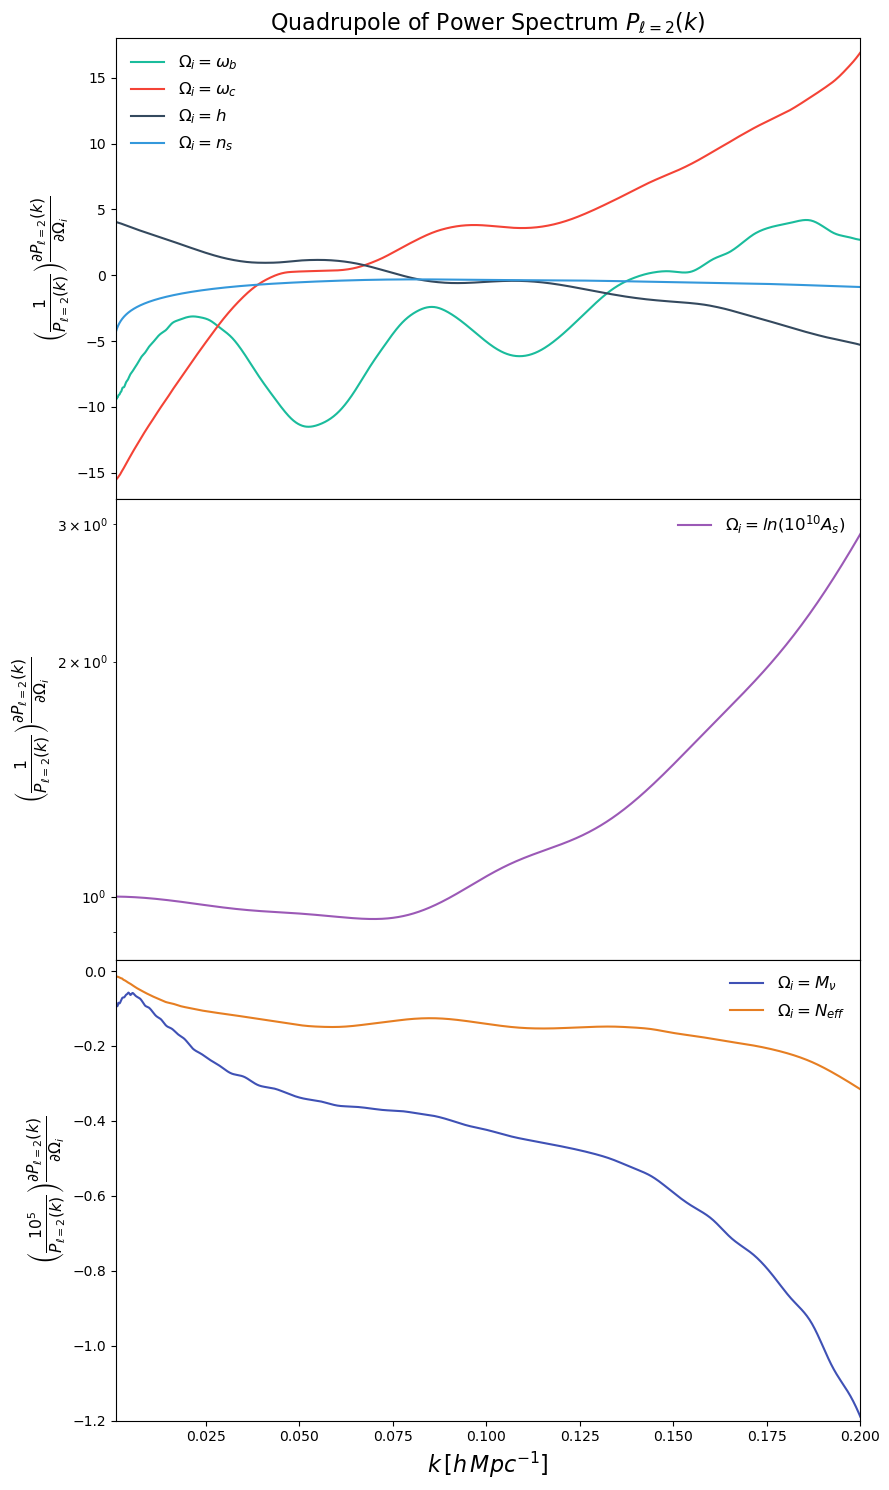

In [13]:
# Quadrupole
fig, axs = plt.subplots(3, 1, figsize=(9,15))
axs[0].set_ylabel(r'$\left(\frac{1}{P_{\ell = 2}(k)}\right)\frac{\partial P_{\ell = 2}(k)}{\partial \Omega_i}$', fontsize=16)
axs[0].plot(kh, (Pkl2_Delta1 - Pkl2)/(Delta_omega_b - omega_b)/Pkl2, color=colors[0], ls='-', label=r'$\Omega_i = \omega_b$')
axs[0].plot(kh, (Pkl2_Delta2 - Pkl2)/(Delta_omega_cdm - omega_cdm)/Pkl2, color=colors[1], ls='-', label=r'$\Omega_i = \omega_c$')
axs[0].plot(kh, (Pkl2_Delta5 - Pkl2)/(Delta_h - h)/Pkl2, color=colors[4], ls='-', label=r'$\Omega_i = h$')
axs[0].plot(kh, (Pkl2_Delta3 - Pkl2)/(Delta_ns - ns)/Pkl2, color=colors[2], ls='-', label=r'$\Omega_i = n_s$')
axs[0].set_xlim([kh[0], 0.2])
axs[0].set_ylim([-17, 18])
axs[0].set_xticks([])
axs[0].set_title('Quadrupole of Power Spectrum $P_{\ell = 2}(k)$', fontsize=16)
leg1 = axs[0].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);

axs[1].set_ylabel(r'$\left(\frac{1}{P_{\ell = 2}(k)}\right)\frac{\partial P_{\ell = 2}(k)}{\partial \Omega_i}$', fontsize=16)
axs[1].plot(kh, (Pkl2_Delta4 - Pkl2)/(Delta_log10As - log10As)/Pkl2, color=colors[3], ls='-', label=r'$\Omega_i = ln(10^{10}A_s)$')
axs[1].set_xlim([kh[0], 0.2])
axs[1].set_ylim([0.83, 3.23])
axs[1].set_xticks([])
axs[1].set_yscale('log')
leg1 = axs[1].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);

axs[2].set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize=16)
axs[2].set_ylabel(r'$\left(\frac{10^5}{P_{\ell = 2}(k)}\right)\frac{\partial P_{\ell = 2}(k)}{\partial \Omega_i}$', fontsize=16)
axs[2].plot(kh, (Pkl2_Delta6 - Pkl2)/(Delta_Mnu - Mnu)/Pkl2, color=colors[5], ls='-', label=r'$\Omega_i = M_{\nu}$')
axs[2].plot(kh, (Pkl2_Delta7 - Pkl2)/(Delta_Neff - Neff)/Pkl2, color=colors[6], ls='-', label=r'$\Omega_i = N_{eff}$')
axs[2].set_xlim([kh[0], 0.2])
axs[2].set_ylim([-1.2, 0.03])
leg1 = axs[2].legend(loc = 'best', fontsize=12)
leg1.get_frame().set_linewidth(0.0);
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.show()

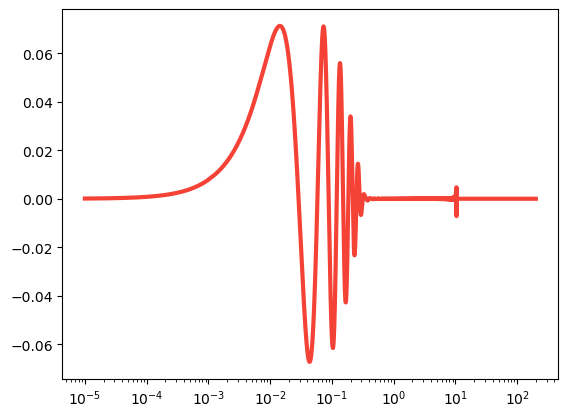

In [14]:
def remove_wiggles(k, PSLk, h=0.6711):
    '''Routine (based on J. Hamann et. al. 2010, arXiv:1003.3999) to get the non-wiggle piece of the linear power spectrum.    
    
    Args:
        k: wave-number.
        PSLk: linear power spectrum.
        h: H0/100.
    Returns:
        Pw and Pnw pieces.
    '''
    pk_in = np.stack((k,PSLk))
    pk_extrapolated = FOLPS.Extrapolate_inputpkl(pk_in)
    kout,pknw = FOLPS.pknwJ(pk_extrapolated[0],pk_extrapolated[1],h)
    pk_in_int=FOLPS.interp(kout,pk_extrapolated[0],pk_extrapolated[1])
    pkw = pk_in_int-pknw
    
    
    return(kout,pknw,pkw)  

k_nw, pk_nw, pk_w = remove_wiggles(k_L, pkT[1])

plt.plot(k_nw, pk_w/pk_nw, label=r'$\frac{\sin(x+\delta)-\sin(x)}{\delta}$', color=colors[1], linestyle='-', linewidth=3)
# plt.plot(k_nw, pk_w, label='$\cos (x)$', color=colors[2], linestyle='-.', linewidth=2)
plt.xscale('log')
plt.show()